In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import GraphHelpers as GH
from scipy.interpolate import interp1d

In [2]:
ExptCvNames = ['EGA_Gregory', 'EGA_Wedgetail', 'Illabo', 'Janz', 'LRPB_Kittyhawk',
       'LRPB_Mowhawk', 'Mace', 'Meering', 'Osprey', 'Rosella', 'Scepter',
       'Sunmaster', 'Whistler', 'Wyalkatchem', 'Wylah', 'Yitpi']
APSIMCvNames = ['Gregory', 'Wedgetail', 'Illabo', 'Janz', 'Kittyhawk',
       'Mowhawk', 'Mace', 'Meering', 'Osprey', 'Rosella', 'Scepter',
       'Sunmaster', 'Whistler', 'Wyalkatchem', 'Wylah', 'Yitpi']
CVNames = dict(zip(ExptCvNames,APSIMCvNames))

In [3]:
# import io
# import sharepy
# import pandas as pd

# URL = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# SHAREPOINT_USER = 'Hamish.Brown@plantandfood.co.nz'
# SHAREPOINT_PASSWORD = 'ZORr%zJ4WAT2&KHc'
# FILE_URL = '/Shared%20Documents/General/Experiments/UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'

# s = sharepy.connect(URL, username=SHAREPOINT_USER, password=SHAREPOINT_PASSWORD)
# r = s.get(URL+FILE_URL)
# f = io.BytesIO(r.content)
# df = pd.read_csv(f)

In [4]:
from office365.runtime.auth.authentication_context import AuthenticationContext
# from office365.sharepoint.client_context import ClientContext
# from office365.sharepoint.files.file import File 

# ####inputs########
# # This will be the URL that points to your sharepoint site. 
# # Make sure you change only the parts of the link that start with "Your"
# url_shrpt = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# username_shrpt = 'Hamish.Brown@plantandfood.co.nz'
# password_shrpt = 'ZORr%zJ4WAT2&KHc'
# folder_url_shrpt = '/Shared%20Documents/General/Experiments/'
# fileName = 'UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'
# #######################

# ctx_auth = AuthenticationContext(url_shrpt)
# ctx_auth.acquire_token_for_user(username_shrpt, password_shrpt)   
# ctx = ClientContext(url_shrpt, ctx_auth)
# response = File.open_binary(ctx, folder_url_shrpt+fileName)
# with open("./User Guide.docx", "wb") as local_file:
#     local_file.write(response.content)

In [5]:
HaunStageData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='Haun stage', usecols="D,L,P")
HaunStageData.columns = ['Cultivar','Clock.Today','Wheat.Phenology.HaunStage']
HaunStageData.loc[:,'Cultivar'] = [CVNames[x] for x in HaunStageData.loc[:,'Cultivar']]
HaunStageData.loc[:,'SimulationName'] = ['Dookie2024Cv'+HaunStageData.loc[x,'Cultivar'] for x in HaunStageData.index]
HaunStageData.set_index(['SimulationName','Clock.Today'],inplace=True)
HaunStageData.drop('Cultivar',axis=1,inplace=True)
HaunStageData.sort_index(inplace=True)
HaunStageData.dropna(inplace=True)
HaunStageMeans = HaunStageData.groupby(['SimulationName','Clock.Today']).mean()

In [6]:
SimulationNames = HaunStageData.index.get_level_values(0).drop_duplicates()

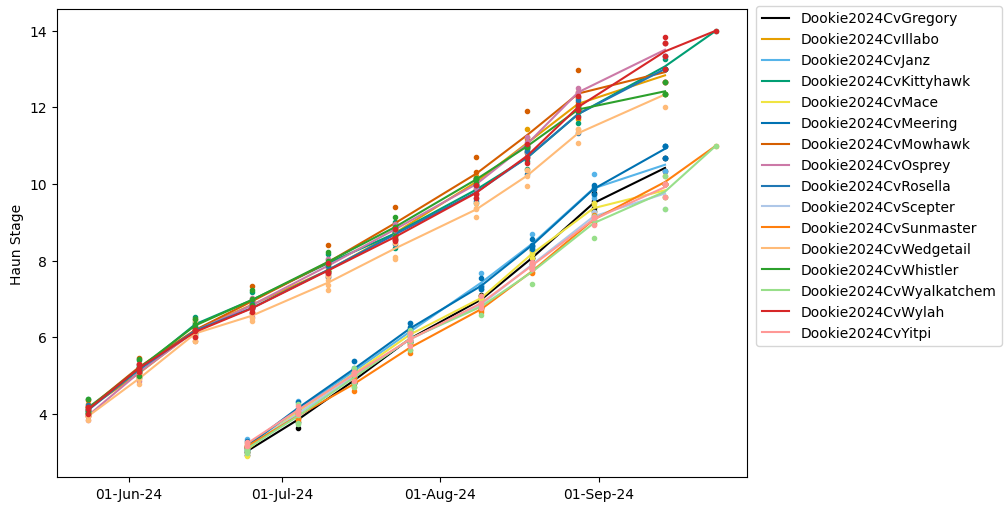

In [7]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(HaunStageMeans.loc[s,:],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(HaunStageData.loc[s,:],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('Haun Stage')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')


In [8]:
NDVIData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='NDVI & height', usecols="D,L,M,N")
NDVIData.columns = ['Cultivar','Clock.Today','Wheat.Height','NDVIModel.Script.NDVI']
NDVIData.loc[:,'Cultivar'] = [CVNames[x] for x in NDVIData.loc[:,'Cultivar']]
NDVIData.loc[:,'SimulationName'] = ['Dookie2024Cv'+NDVIData.loc[x,'Cultivar'] for x in NDVIData.index]
NDVIData.set_index(['SimulationName','Clock.Today'],inplace=True)
NDVIData.drop('Cultivar',axis=1,inplace=True)
NDVIData.sort_index(inplace=True)
NDVIData.dropna(inplace=True,how='all')
NDVIMeans = NDVIData.groupby(['SimulationName','Clock.Today']).mean()

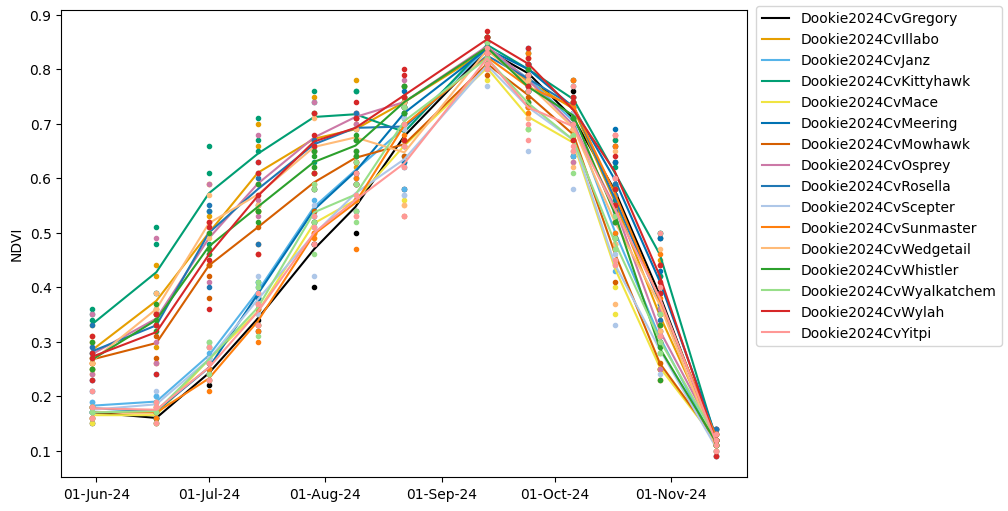

In [9]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(NDVIMeans.loc[s,'NDVIModel.Script.NDVI'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(NDVIData.loc[s,'NDVIModel.Script.NDVI'],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('NDVI')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')


In [10]:
EmergenceData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='Emergence', usecols="D,K,L")
EmergenceData.columns = ['Cultivar','Clock.Today','#Emerged']
EmergenceData.loc[:,'Cultivar'] = [CVNames[x] for x in EmergenceData.loc[:,'Cultivar']]
EmergenceData.loc[:,'SimulationName'] = ['Dookie2024Cv'+EmergenceData.loc[x,'Cultivar'] for x in EmergenceData.index]
EmergenceData.set_index(['SimulationName','Clock.Today'],inplace=True)
EmergenceData.drop('Cultivar',axis=1,inplace=True)
EmergenceData.sort_index(inplace=True)
EmergenceData.dropna(inplace=True,how='all')
EmergenceMeans = EmergenceData.groupby(['SimulationName','Clock.Today']).mean()

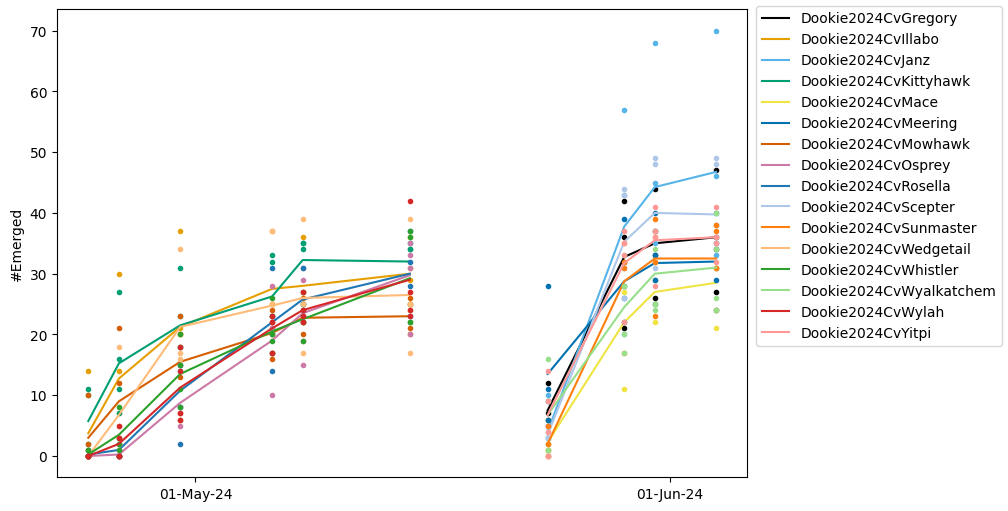

In [11]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(EmergenceMeans.loc[s,'#Emerged'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(EmergenceData.loc[s,'#Emerged'],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('#Emerged')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')

In [35]:
MaxEmerge = EmergenceMeans.groupby('SimulationName').max()
EmergenceMeans.loc[:,'DOY'] = [x.timetuple().tm_yday for x in EmergenceMeans.index.get_level_values(1)]
EmergenceMeans.loc[:,'Max#Emerged'] = [MaxEmerge.loc[x[0],'#Emerged'] for x in EmergenceMeans.index]
EmergenceMeans.loc[:,'%Emerged'] = EmergenceMeans.loc[:,'#Emerged']/EmergenceMeans.loc[:,'Max#Emerged']

EmergenceDates = pd.DataFrame(index = SimulationNames)
for s in SimulationNames:
    TreatData = EmergenceMeans.loc[s,['DOY','%Emerged']].sort_values('DOY')
    f = interp1d(TreatData.loc[:,'%Emerged'],TreatData.loc[:,'DOY'] )
    emergeDOY = np.round(f(0.50))
    EmergenceDates.loc[s,'Clock.Today'] = datetime.datetime(2024, 1, 1) + datetime.timedelta(emergeDOY - 1) 
EmergenceDates.loc[:,'Wheat.Phenology.Stage'] = 3.0
EmergenceDates.set_index('Clock.Today',append=True,inplace=True)

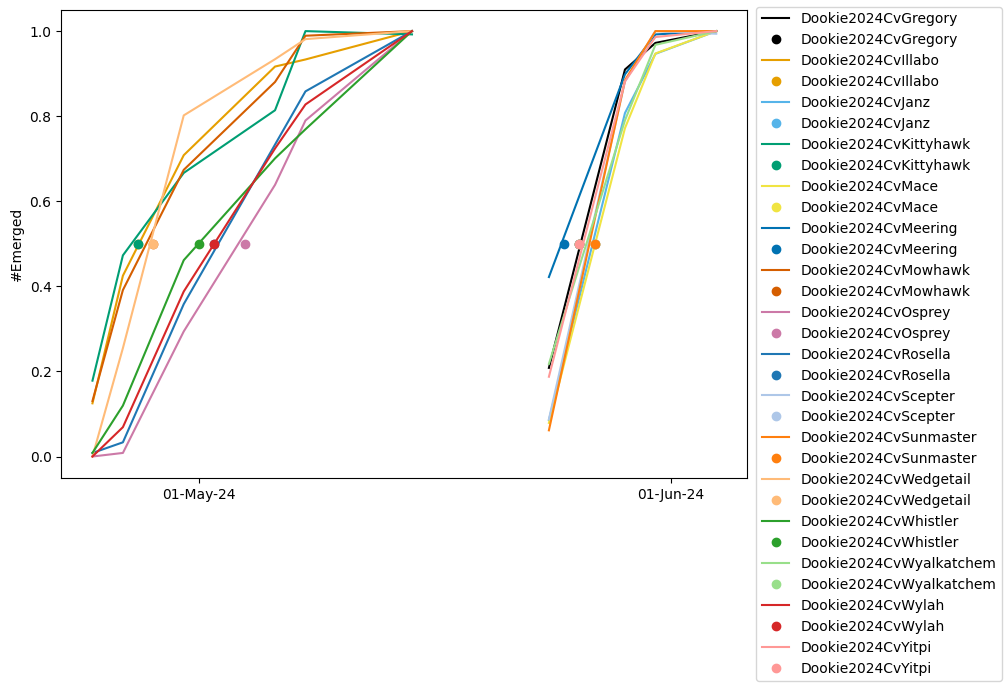

In [37]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(EmergenceMeans.loc[s,'%Emerged'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(EmergenceDates.loc[s,:].index.values[0],0.5,'o',color=GH.Colors[pos],label=s)
    pos+=1
plt.ylabel('#Emerged')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')

In [18]:
FlagLeafData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='PCDS 6.0', usecols="D,L,O")
FlagLeafData.columns = ['Cultivar','Clock.Today','%FlagLeaf']
FlagLeafData.loc[:,'Cultivar'] = [CVNames[x] for x in FlagLeafData.loc[:,'Cultivar']]
FlagLeafData.loc[:,'SimulationName'] = ['Dookie2024Cv'+FlagLeafData.loc[x,'Cultivar'] for x in FlagLeafData.index]
FlagLeafData.set_index(['SimulationName','Clock.Today'],inplace=True)
FlagLeafData.drop('Cultivar',axis=1,inplace=True)
FlagLeafData.sort_index(inplace=True)
FlagLeafData.dropna(inplace=True,how='all')
FlagLeafMeans = FlagLeafData.groupby(['SimulationName','Clock.Today']).mean()

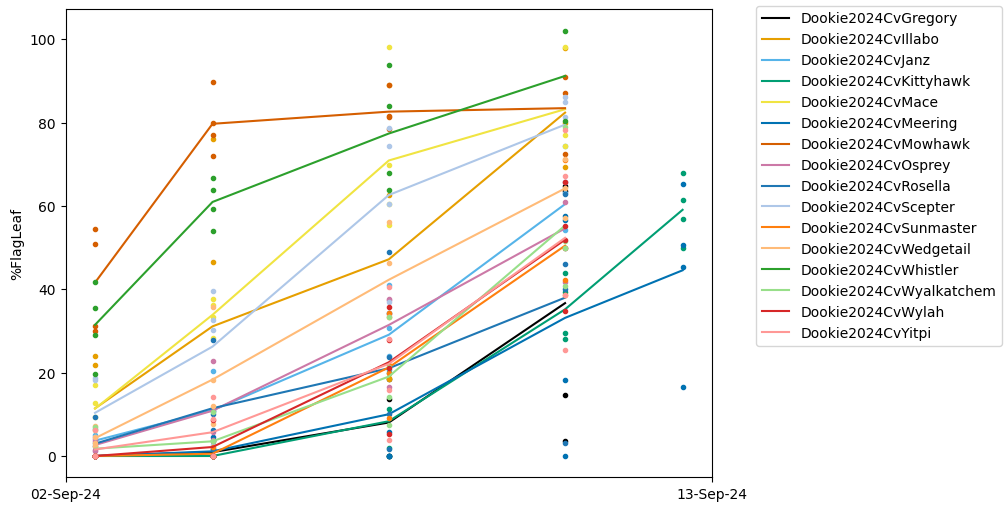

In [19]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(FlagLeafMeans.loc[s,'%FlagLeaf'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(FlagLeafData.loc[s,'%FlagLeaf'],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('%FlagLeaf')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')

In [71]:
def append50(TreatData,varName):
    run = TreatData.iloc[-1,0]-TreatData.iloc[-2,0]
    rise = TreatData.iloc[-1,1]-TreatData.iloc[-2,1]
    slope = rise/run
    d50 = np.round(TreatData.iloc[-1,0] + (50 - TreatData.iloc[-1,1]) / slope)
    date50 = datetime.datetime(2024, 1, 1) + datetime.timedelta(d50 - 1)
    TreatData.loc[date50,'DOY'] = d50
    TreatData.loc[date50,varName] = 50
    return TreatData

FlagLeafMeans.loc[:,'DOY'] = [x.timetuple().tm_yday for x in FlagLeafMeans.index.get_level_values(1)]
FlagLeafDates = pd.DataFrame(index = SimulationNames)
for s in SimulationNames:
    TreatData = FlagLeafMeans.loc[s,['DOY','%FlagLeaf']].sort_values('DOY')
    if TreatData.iloc[-1,1] < 50:
        TreatData = append50(TreatData,'%FlagLeaf')
    f = interp1d(TreatData.loc[:,'%FlagLeaf'],TreatData.loc[:,'DOY'] )
    flagDOY = np.round(f(50))
    FlagLeafDates.loc[s,'Clock.Today'] = datetime.datetime(2024, 1, 1) + datetime.timedelta(flagDOY - 1) 
FlagLeafDates.loc[:,'Wheat.Phenology.Stage'] = 6.0
FlagLeafDates.set_index('Clock.Today',append=True,inplace=True)

In [61]:
AnthesisData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='PCDS 8.0', usecols="D,L,O")
AnthesisData.columns = ['Cultivar','Clock.Today','%Anthesis']
AnthesisData.loc[:,'Cultivar'] = [CVNames[x] for x in AnthesisData.loc[:,'Cultivar']]
AnthesisData.loc[:,'SimulationName'] = ['Dookie2024Cv'+AnthesisData.loc[x,'Cultivar'] for x in AnthesisData.index]
AnthesisData.set_index(['SimulationName','Clock.Today'],inplace=True)
AnthesisData.drop('Cultivar',axis=1,inplace=True)
AnthesisData.sort_index(inplace=True)
AnthesisData.dropna(inplace=True,how='all')
AnthesisMeans = AnthesisData.groupby(['SimulationName','Clock.Today']).mean()

C:\Users\Cflhxb\AppData\Local\Temp\ipykernel_23916\1916805518.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(AnthesisData.loc[s,'%Anthesis'],'o',ms=3,color=GH.Colors[pos])


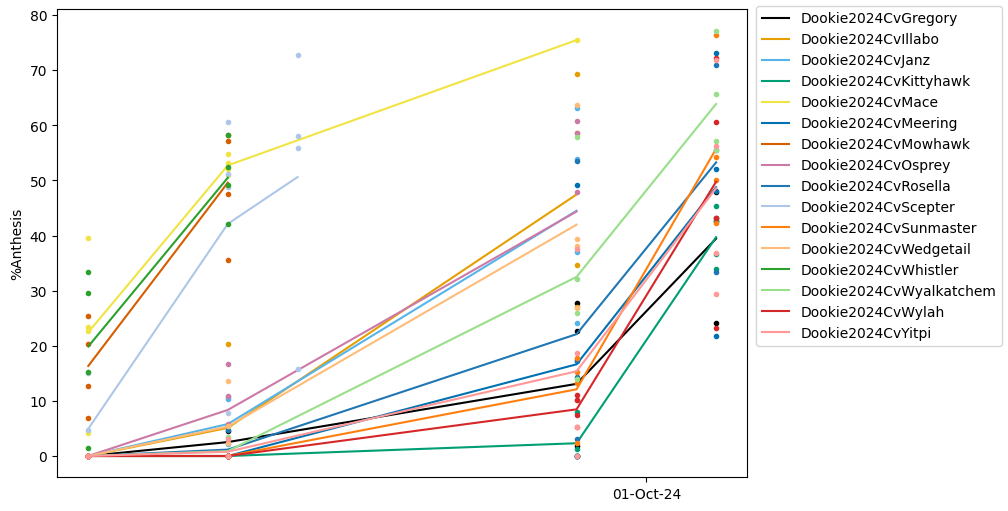

In [62]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(AnthesisMeans.loc[s,'%Anthesis'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(AnthesisData.loc[s,'%Anthesis'],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('%Anthesis')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')

In [72]:
AnthesisMeans.loc[:,'DOY'] = [x.timetuple().tm_yday for x in AnthesisMeans.index.get_level_values(1)]
AnthesisDates = pd.DataFrame(index = SimulationNames)
for s in SimulationNames:
    TreatData = AnthesisMeans.loc[s,['DOY','%Anthesis']].sort_values('DOY')
    if TreatData.iloc[-1,1] < 50:
        TreatData = append50(TreatData,'%Anthesis')
    f = interp1d(TreatData.loc[:,'%Anthesis'],TreatData.loc[:,'DOY'] )
    anthesisDOY = np.round(f(50))
    AnthesisDates.loc[s,'Clock.Today'] = datetime.datetime(2024, 1, 1) + datetime.timedelta(anthesisDOY - 1) 
AnthesisDates.loc[:,'Wheat.Phenology.Stage'] = 8.0
AnthesisDates.set_index('Clock.Today',append=True,inplace=True)

In [74]:
Observed = pd.concat([NDVIMeans,HaunStageMeans,EmergenceDates,FlagLeafDates,AnthesisDates])
Observed.to_excel('../data/Dookie2024.xlsx',sheet_name='Observed',merge_cells=False)